In [ ]:
from openai import OpenAI
import json

# Завантаження ключів API з файлу для безпеки
with open("keys.json") as f:
    keys = json.load(f)

client = OpenAI(api_key=keys["openai_api"])
model = "gpt-5-nano"
instructions = "pure python code only, no explanations, comments, markdown code fences, file names, headings, or any other text"

# Генерація коду швидкого сортування
response = client.responses.create(
    model=model,
    instructions=instructions,
    input="Generate a quicksort algorithm (quicksort(array)) that modifies the array directly",
)

print(response.output_text)

def quicksort(array):
    if array is None or len(array) < 2:
        return
    def partition(a, low, high):
        pivot = a[high]
        i = low
        for j in range(low, high):
            if a[j] <= pivot:
                a[i], a[j] = a[j], a[i]
                i += 1
        a[i], a[high] = a[high], a[i]
        return i
    def _quicksort(a, low, high):
        if low < high:
            p = partition(a, low, high)
            _quicksort(a, low, p - 1)
            _quicksort(a, p + 1, high)
    _quicksort(array, 0, len(array) - 1)


In [ ]:
# Запуск згенерованого коду 
exec(response.output_text)

In [ ]:
import random

arr = [random.randint(0, 10000) for _ in range(1000)]

print(arr)

quicksort(arr)

print(arr)

[6044, 732, 240, 6225, 3357, 770, 3530, 9388, 2683, 6230, 4097, 720, 5661, 1124, 309, 1673, 3212, 4917, 5693, 9445, 9984, 7252, 7125, 5351, 3751, 2594, 9603, 6026, 3185, 7940, 7668, 8573, 2366, 7343, 7543, 2973, 6225, 5542, 9265, 9809, 2792, 2076, 5267, 6102, 8542, 5133, 5801, 4925, 6155, 9011, 8643, 4540, 2808, 8245, 5300, 9858, 1890, 5676, 4930, 5594, 5191, 2975, 169, 2473, 9663, 5867, 2279, 8548, 8327, 9934, 7416, 1400, 7396, 8773, 5264, 8515, 383, 2944, 1587, 4261, 5634, 1280, 6331, 1956, 6581, 4109, 453, 9910, 6518, 621, 8935, 5649, 606, 4976, 45, 724, 2947, 9360, 7034, 233, 6782, 465, 1807, 2185, 432, 1454, 7856, 7693, 3872, 3566, 2504, 2129, 5171, 9848, 4546, 7760, 1030, 663, 3174, 1118, 4435, 5105, 5998, 2978, 2596, 6694, 9086, 9394, 777, 7104, 9057, 9017, 6540, 7791, 3495, 870, 7006, 5575, 4837, 3797, 5476, 2342, 2541, 1298, 8274, 8881, 7660, 4066, 3378, 8404, 8865, 2225, 5312, 250, 4006, 2765, 1060, 1602, 1129, 358, 9732, 564, 9103, 3745, 7152, 8354, 2953, 7429, 3173, 3655, 2

In [ ]:
# Генерація коду пошуку простих чисел у масиві
responsePrime = client.responses.create(
    model=model,
    instructions=instructions,
    input="Generate an algorithm (prime(array)) that searchs and returns all prime numbers in array",
)

print(responsePrime.output_text)

def prime(array):
    def is_prime(n):
        if not isinstance(n, int):
            return False
        if n < 2:
            return False
        if n == 2 or n == 3:
            return True
        if n % 2 == 0 or n % 3 == 0:
            return False
        i = 5
        while i * i <= n:
            if n % i == 0 or n % (i + 2) == 0:
                return False
            i += 6
        return True

    result = []
    for x in array:
        if is_prime(x):
            result.append(x)
    return result


In [5]:
exec(responsePrime.output_text)

print(prime(arr))

[163, 167, 211, 229, 233, 269, 277, 383, 401, 419, 457, 503, 577, 661, 701, 727, 809, 907, 941, 1129, 1217, 1223, 1231, 1361, 1523, 1559, 1579, 1627, 1627, 1657, 1867, 1889, 1997, 2053, 2099, 2113, 2129, 2213, 2377, 2459, 2473, 2683, 2801, 2803, 2953, 2971, 2971, 3023, 3023, 3049, 3259, 3449, 3541, 3581, 3631, 3797, 3803, 4001, 4007, 4157, 4261, 4621, 4651, 4721, 4721, 4721, 4759, 5023, 5119, 5171, 5233, 5351, 5519, 5659, 5693, 5711, 5801, 5867, 5987, 6247, 6323, 6481, 6581, 6701, 6971, 6983, 7069, 7213, 7369, 7523, 7727, 7883, 8117, 8291, 8429, 8563, 8573, 8647, 8741, 9011, 9067, 9103, 9157, 9187, 9319, 9371, 9479, 9551, 9857, 9931]


import pandas as pd
import matplotlib.pyplot as plt

neighborhoods = df['Neighborhood'].dropna().unique().tolist()
if not neighborhoods:
    raise ValueError("No neighborhoods found in df.")
filter_value = neighborhoods[0]

filtered = df[df['Neighborhood'] == filter_value]

mean_price = filtered['Price'].mean()
print(f"Mean Price for Neighborhood '{filter_value}': {mean_price}")

plt.figure(figsize=(8,5))
plt.hist(filtered['Price'], bins=50, color='steelblue', alpha=0.7)
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_price:.2f}")
plt.title(f"Price distribution for Neighborhood: {filter_value}")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
Mean Price for Neighborhood 'Rural': 224096.1260397619


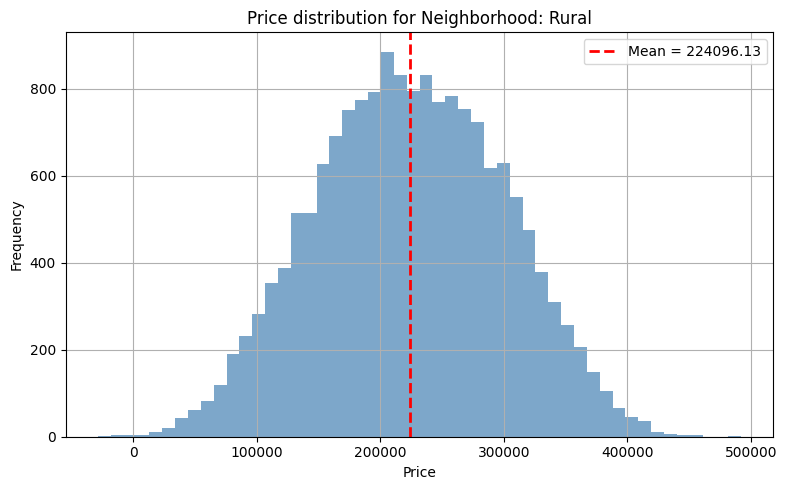

In [ ]:
import pandas as pd
from io import StringIO

# Завантаження датасету про ціни на житло 
df = pd.read_csv("data/housing_price_dataset.csv")

buffer = StringIO()
df.info(buf=buffer)
info = buffer.getvalue()

# Генерація коду аналізу датафрейму: фільтрація рядків, обчислення середнього значення та побудова графіка
responseDataA = client.responses.create(
    model=model,
    instructions=instructions,
    input=f"Generate python code that analyzes the given dataframe 'df' filters rows on a specific value, and calculates the mean of another column and makes a plot. Use info about dataframe: {info}. Execute it.",
)

print(responseDataA.output_text)
exec(responseDataA.output_text)